In [15]:
import re
import pandas as pd

import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stop_words = stopwords.words("english")

from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiph\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
!pip install scispacy

In [4]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_md-0.5.0.tar.gz

  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.5.0-py3-none-any.whl size=120252814 sha256=6f477d16e0465a19fcb3f96b5286c19b37a88aa9ce3aa12f57337e758d6afbac
  Stored in directory: c:\users\saiph\appdata\local\pip\cache\wheels\bb\3e\5a\30e0a260ae99ad70b78a0b08569a6e7f913d26781f810d1625
Successfully built en-core-sci-md


In [5]:
import scispacy
import spacy

nlp = spacy.load("en_core_sci_md")

In [6]:
# Aggergating all the pkl files to keep a track of number of tweets extracter per each search term.
from os import listdir
from os.path import isfile, join

PATH = r"XXX"

pkl_files = [f for f in listdir(PATH) if isfile(join(PATH, f)) and ".pkl" in f]

In [7]:
tweets_df = pd.DataFrame()

for pkl_file in pkl_files:
    temp_df = pd.read_pickle(pkl_file)
    tweets_df = tweets_df.append(temp_df)

tweets_df = tweets_df.reset_index(drop=True)

In [8]:
tweets_df.shape

(42913, 29)

In [9]:
tweets_df.head()

,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,links
0,https://twitter.com/PaoloC_1/status/1470768091...,2021-12-14 14:50:13+00:00,@KBGreyhoundlady Amitriptyline is also a sedat...,@KBGreyhoundlady Amitriptyline is also a sedat...,1470768091550388238,"{'username': 'PaoloC_1', 'id': 602890495, 'dis...",1,0,2,0,...,None,1470653639475744768.0,"{'username': 'KBGreyhoundlady', 'id': 87308705...","[{'username': 'KBGreyhoundlady', 'id': 8730870...","{'longitude': -0.39216, 'latitude': 51.391383}","{'fullName': 'Richmond, London', 'name': 'Rich...",None,None,None,NaN
1,https://twitter.com/Celticheart72/status/14612...,2021-11-18 06:55:41+00:00,@shadyboots30 @SoIsFibroReal I take Amitriptyl...,@shadyboots30 @SoIsFibroReal I take Amitriptyl...,1461226587790131201,"{'username': 'Celticheart72', 'id': 27106696, ...",2,0,0,0,...,None,1460998876501061632.0,"{'username': 'shadyboots30', 'id': 2947749449,...","[{'username': 'shadyboots30', 'id': 2947749449...","{'longitude': -0.080028, 'latitude': 51.48432}","{'fullName': 'Poplar, London', 'name': 'Poplar...",None,None,None,NaN
2,https://twitter.com/Ed_Jabbari/status/14589322...,2021-11-11 22:58:49+00:00,"10mg Amitriptyline, 500mg Levetiracetam, 1g Me...","10mg Amitriptyline, 500mg Levetiracetam, 1g Me...",1458932254563053581,"{'username': 'Ed_Jabbari', 'id': 4326753748, '...",1,0,6,0,...,None,NaN,None,None,"{'longitude': -0.1420579, 'latitude': 51.5185518}","{'fullName': 'Islington, London', 'name': 'Isl...",None,None,None,NaN
3,https://twitter.com/LadyPandalorian/status/143...,2021-09-14 22:42:29+00:00,"@BrummyBoy13 ""Amitriptyline: a medicine used t...","@BrummyBoy13 ""Amitriptyline: a medicine used t...",1437909645255905290,"{'username': 'LadyPandalorian', 'id': 29456209...",1,0,1,0,...,None,1437909217655066624.0,"{'username': 'BrummyBoy13', 'id': 818923348847...","[{'username': 'BrummyBoy13', 'id': 81892334884...","{'longitude': -0.1114755, 'latitude': 51.4194247}","{'fullName': 'Camberwell, London', 'name': 'Ca...",None,None,{'title': 'Amitriptyline: a medicine used to t...,NaN
4,https://twitter.com/NichSmith/status/143631713...,2021-09-10 13:14:24+00:00,@_Widdershins_ @Joel32272266 @Hedgehog91_ @scr...,@_Widdershins_ @Joel32272266 @Hedgehog91_ @scr...,1436317134414614528,"{'username': 'NichSmith', 'id': 37434056, 'dis...",0,0,0,0,...,None,1436287854414548992.0,"{'username': '_Widdershins_', 'id': 1016349319...","[{'username': 'Joel32272266', 'id': 1387056644...","{'longitude': -0.15191, 'latitude': 51.410792}","{'fullName': 'Lambeth, London', 'name': 'Lambe...",None,None,None,NaN


In [10]:
tweets_df["clean_tweet"] = tweets_df["content"].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x).split()))

In [16]:
medical_terms = []

for tweet in tqdm(tweets_df["clean_tweet"].values):
    doc = nlp(tweet)
    medical_terms += [*doc.ents]

100%|██████████| 42913/42913 [13:45<00:00, 51.97it/s]


In [24]:
medical_terms = [str(term).lower() for term in medical_terms]

In [25]:
from collections import Counter

medical_term_counts = Counter(medical_terms)

In [26]:
len(medical_term_counts)

72357

In [27]:
medical_term_counts

Counter({'amitriptyline': 12,
         'sedative prescribed': 2,
         'insomnia': 189,
         'day': 1797,
         'lyrica': 2,
         'duloxetine': 3,
         'naproxen': 4,
         'codine i': 2,
         'rheumatologist': 2,
         'pain specialist': 2,
         'rubbish': 50,
         'i': 1904,
         'levetiracetam': 1,
         'methylprednisolone': 1,
         'medicine': 11,
         'treat': 58,
         'pain': 66,
         'prevent': 28,
         'nhs': 176,
         'widdershins': 1,
         'mild': 16,
         'sedative': 1,
         'elderly': 27,
         'psychiatry': 2,
         'toxic': 27,
         'overdose': 4,
         'therapeutic': 6,
         'imagine': 26,
         'amitryptiline i': 1,
         'pressure': 39,
         'shingles rash': 1,
         'post': 201,
         'chemo': 5,
         'immunotherapy': 2,
         'prophylactic': 1,
         'phn': 1,
         'weeks': 281,
         'prescription': 13,
         'self physio': 1,
        

In [32]:
for term, count in medical_term_counts.most_common(100):
    print(term, count)

sad 9881
people 2258
i 1904
day 1797
anxiety 1731
news 1643
very sad 1451
blue 1445
empty 1419
london 1117
years 993
time 873
year 860
man 671
rip 621
week 599
uk 560
family 547
days 543
despair 474
friends 448
lost 436
morning 419
world 418
someone 407
night 392
person 383
life 361
country 361
live 354
game 347
happy 346
team 307
home 305
women 291
music 285
brexit 283
weeks 281
watching 275
months 274
thank 270
job 269
sad i 268
blue skies 264
lockdown 261
men 257
hopeless 256
died 248
car 246
christmas 244
football 238
young 237
government 236
children 231
season 231
loss 229
lonely 224
money 223
covid 222
united kingdom 221
twitter 218
england 218
moment 210
lives 210
depression 208
death 208
working 204
friend 204
shelves 204
unitedkingdom zerowaste 203
colour 202
post 201
thinking 199
story 199
blue sky 192
lots 191
really sad 191
insomnia 189
players 187
weekend 186
nhs 176
kids 176
seats 176
course 172
experience 170
pandemic 170
business 170
today 167
stop 167
police 167
memor

In [56]:
# Count of Treatment Terms
treatment_terms = ["Cognitive Behavioural Therapy", "Light Therapy", 
                   "CBT", "Selective Serotonin Reuptake Inhibitor", 
                   "SSRI", "Serotonin", "Antidepressant", "Gestalt"]

In [57]:
tt_counts = []
for treatment_term in treatment_terms:
    if treatment_term.lower() in medical_term_counts:
        print(treatment_term, medical_term_counts[treatment_term.lower()])

Cognitive Behavioural Therapy 2
Light Therapy 3
CBT 124
SSRI 11
Serotonin 27
Antidepressant 34


In [52]:
medicine_terms = ["Citalopram", "Cipramil", "Escitalopram",
                  "Cipralex", "Fluoxetine", "Prozac", "Fluvoxamine",
                  "Faverin", "Paroxetine", "Seroxat", "Sertraline",
                  "Lustral", "Duloxetine", "Cymbalta", "Yentreve", 
                  "Venlafaxine", "Efexor", "Reboxetine", "Edronax",
                  "Amitriptyline", "Clomipramine", "Doxepin", "Trimipramine",
                  "Mianserin", "Imipramine", "Iofepramine", "Isocarboxazid",
                  "Phenelzine", "Tranylcypromine", "Moclobemide", "Mirtazapine"]

In [53]:
for medicine_term in medicine_terms:
    if medicine_term.lower() in medical_term_counts:
        print(medicine_term, medical_term_counts[medicine_term.lower()])

Citalopram 31
Escitalopram 19
Cipralex 1
Fluoxetine 10
Prozac 30
Fluvoxamine 3
Sertraline 60
Duloxetine 3
Venlafaxine 24
Amitriptyline 12
Mirtazapine 2


In [33]:
!pip install wordcloud

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [40]:
stop_words = set(stopwords.words("english"))

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(" ".join(medical_terms))

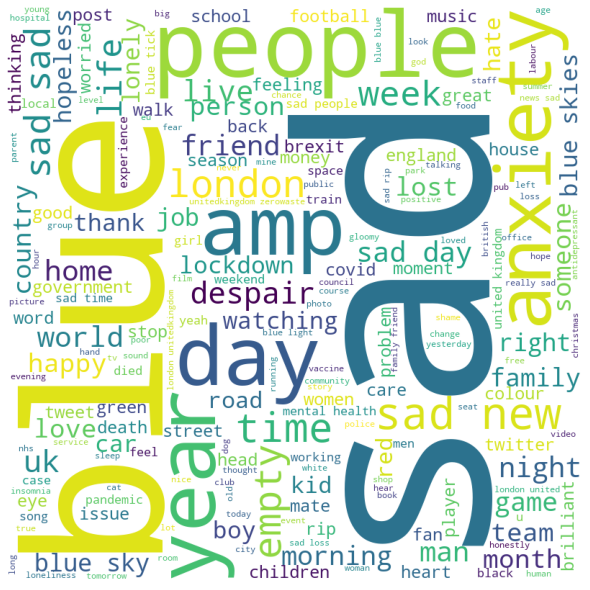

In [41]:
plt.figure(figsize = (8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()